# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

The goal of this project is to predict which students will need an intervention or not in order to prevent them fail at school. In my point of view, this is a typical classification problem where the input data has many features and the output is if the student passed or not. On the order hand, regression problems are usually those where we should predict a quantity and not a category, like this one.

Additionally, I found an interesting scheme about estimators that confirms the proposed project as a classification problem:

<img src="http://scikit-learn.org/stable/_static/ml_map.png" >
[From: Scikit-learn - Choosing the right estimator](http://scikit-learn.org/stable/tutorial/machine_learning_map/)

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [101]:
# Versions
import sklearn
print("Version - Sklearn {}\n".format(sklearn.__version__))

# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
from IPython.display import display # Allows the use of display() for DataFrames

# Read student data
student_data = pd.read_csv("student-data.csv")
print("Student data read successfully!")

# Success
print("\nStudent dataset has {} data points with {} variables each.".format(*student_data.shape))

# Print the first few entries of the RMS Titanic data
print("")
display(student_data.head())

Version - Sklearn 0.18.1

Student data read successfully!

Student dataset has 395 data points with 31 variables each.



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [102]:
# Calculate number of students
n_students = np.size(student_data,0)

# Calculate number of features
# -1 because one feature is the target column (passed or not passed).
n_features = np.size(student_data,1)-1

# Calculate passing students
n_passed = np.size(student_data[student_data.passed == 'yes'], 0)

# Calculate failing students
n_failed = np.size(student_data[student_data.passed == 'no'], 0)

# Calculate graduation rate
grad_rate = float(n_passed)/float(n_students)*100

# Print the results
print("Total number of students: {}".format(n_students))
print("Number of features: {}".format(n_features))
print("Number of students who passed: {}".format(n_passed))
print("Number of students who failed: {}".format(n_failed))
print("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%



## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [103]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print("\nFeature values:")
print(X_all.head())

print("\nTarget column:")
print(y_all.head())

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [104]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


#### Data Exploration (Some plots): Students graduated or did't graduated?

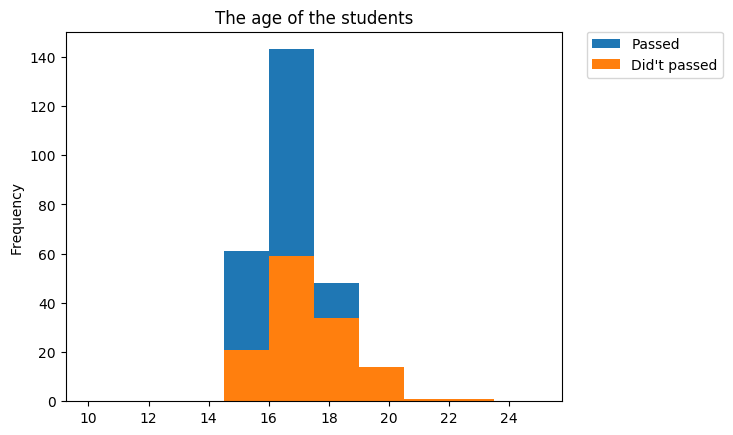

In [105]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt

key = 'age'

data1 = student_data[student_data.passed == 'yes'][key]
res1 = data1.plot.hist(orientation='vertical', cumulative=False, histtype='barstacked', 
                       label="Passed", range=[10,25])

data2 = student_data[student_data.passed == 'no'][key]
res2 = data2.plot.hist(orientation='vertical', cumulative=False, histtype='barstacked', 
                       label="Did\'t passed", range=[10,25])

#plt.ylim((0, 120))
plt.title('The age of the students')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

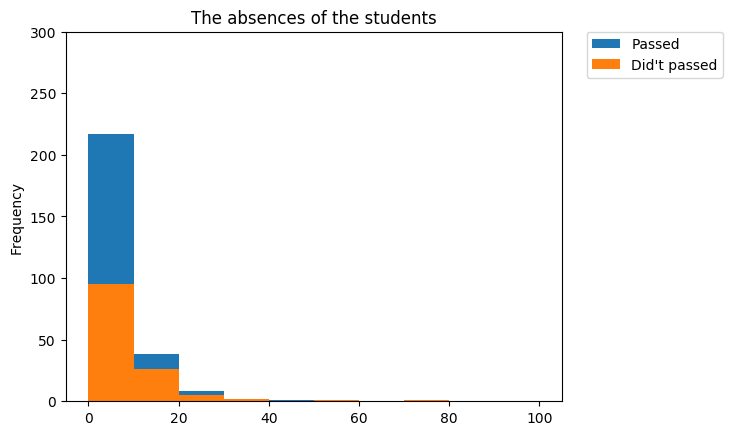

In [106]:
key = 'absences'

data1 = student_data[student_data.passed == 'yes'][key]
res1 = data1.plot.hist(orientation='vertical', cumulative=False, histtype='barstacked', 
                       label="Passed", range=[0,100])

data2 = student_data[student_data.passed == 'no'][key]
res2 = data2.plot.hist(orientation='vertical', cumulative=False, histtype='barstacked', 
                       label="Did\'t passed", range=[0,100])

plt.ylim((0, 300))

plt.title('The absences of the students')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [107]:
# Import 'train_test_split'
# http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.train_test_split.html#sklearn.cross_validation.train_test_split
from sklearn.model_selection import train_test_split

# Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

test_size = float(num_test)/395.

# Shuffle and split the data into training and testing subsets
# stratify = y_all (Reviewer's tip)
# 
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=test_size, random_state=42, stratify = y_all)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?



##### Decision Trees

- __Real-world application__
Decision trees are used in many classification and regression applications. One real-world application of this method is natural language processing for translation.

- __Strengths__:
Decisions trees are easy for anyone to code, visualize, manipulate, and explain. Another advantage is that you don't need to worry about normalizing the data.

-  __Weaknesses__
Decisions trees do not work well with problems that have smooth boundaries. They can easily overfit. Some techniques can be used to overcome this, like K-Fold.

- __Why to use it?__
I decided to use it because it is a good starting point to interpret the dataset. 



##### K-Nearest Neighbors (KNeighbors)

- __Real-world application__
There are many interesting problems that can be solved using K-Nearest Neighbors. For example, a recommender system can be constructed using this method.

- __Strengths__:
K-Nearest Neighbors is robust to noisy training data and it is effective if you have a large dataset. 

-  __Weaknesses__
A limitation of KNN Classifier is memory requirement and time complexity because it is fully dependent on every
example in the training set. Its classification performance depends on choosing the optimal number of neighbors (k), which is different from one data sample to another.

- __Why to use it?__
I decided to use it because it is one of the most intuitive and simplest machine learning algorithms.  


##### Support Vector Machines (SVM)

- __Real-world application__
Support Vector Machine can be used for face recognition. It is a really popular method for solving this problem. 

- __Strengths__:
This method is effective in high dimensional spaces. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

-  __Weaknesses__
If the number of features is much greater than the number of samples, the method is likely to give poor performances.

- __Why to use it?__
SVM is a really popular machine learning method. I decided to use it because it is a powerful method that can solve a large number of problems.

Finally, I decided to use these algortihms also for learning reasons. I have some other problems to solve (recommender system and face recognition) and I'm interested in seeing how these algorithms performed against one another.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [108]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [109]:
# Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Initialize the three models
clf_A = DecisionTreeClassifier(random_state=42)
clf_B = KNeighborsClassifier(n_neighbors=3)
clf_C = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
clf_D = SVC(random_state=42)

# Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

for clf in [clf_A, clf_B, clf_C, clf_D]:
    print("\n{}: \n".format(clf.__class__.__name__))
    for n in [100, 200, 300]:
        # Execute the 'train_predict' function for each classifier and each training set size
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


DecisionTreeClassifier: 

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.3251 seconds
Made predictions in 0.0211 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0231 seconds.
F1 score for test set: 0.6452.
Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0201 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7258.
Training a DecisionTreeClassifier using a training set size of 300. . .
Trained model in 0.0493 seconds
Made predictions in 0.0548 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.6838.

KNeighborsClassifier: 

Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.1126 seconds
Made predictions in 0.5358 seconds.
F1 score for training set: 0.8676.
Made predictions in 0.0315 seconds.
F1 score for 

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - DecisionTreeClassifier **

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.0020s         |         0.0000s        |     1.0000       |      0.6452     |
| 200               |         0.0010s         |         0.0000s        |     1.0000       |      0.7258     |
| 300               |         0.0020s         |         0.0000s        |     1.0000       |      0.6838     |

** Classifer 2 - KNeighborsClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.0010s         |         0.0030s        |     0.8676       |      0.7259     |
| 200               |         0.0010s         |         0.0020s        |     0.8448       |      0.7801     |
| 300               |         0.0010s         |         0.0050s        |     0.8940       |      0.8143     |

** Classifer 3 - MLPClassifier**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.0561s         |         0.0000s        |     0.7853       |      0.7949     |
| 200               |         0.0469s         |         0.0000s        |     0.7866       |      0.7871     |
| 300               |         0.0469s         |         0.0000s        |     0.7976       |      0.7871     |

** Classifer 4 - Support Vector Classification**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.0020s         |         0.0010s        |     0.8354       |      0.8025     |
| 200               |         0.0030s         |         0.0020s        |     0.8431       |      0.8105     |
| 300               |         0.0050s         |         0.0040s        |     0.8664       |      0.8052     |


## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

Analyzing the results presented before the best models are KNeighborsClassifier and Support Vector Classification. They got an F1 Score of 0.8143 and 0.8052, respectively, using a training set size of 300. In addition to analyzing the F1 Score for the testing set, it is important to look at the training time. The training time of the KNeighborsClassifier is considerably smaller than the SVC training time, almost 5 times smaller. The prediction time is similar. Finally, taking into account F1 Score and the training time I choose the KNeighborsClassifier classifier because it obtained the best result with the lowest training time.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

I recommended KNeighborsClassifier. Let me explain how this method works using an example. The example is a problem in determining if a house is cheap, normal or expensive. So, it receives a lot of labeled samples containing some features of the houses: location, the number of rooms, floor, if it is morning sun or afternoon sun, etc. These samples are stored as if they were a database. Then, when a new house comes in, this method is able to look at this database and decide if this new house is cheap, normal or expensive. This decision is made based on the similarity between a new house and the other houses already known.

The same method will be used here to decide if a student needs an intervention or not based on he's featured. 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [110]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier

# Create the parameters list you wish to tune
parameters = {'n_neighbors': [5, 6, 7],
              'weights': ['uniform', 'distance'],
              'algorithm': ['kd_tree', 'brute']}

# Initialize the classifier
clf = KNeighborsClassifier()

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_train, y_train)

# Get the estimator
print("Best estimator found by grid search:")
print(grid_obj.best_estimator_)

# Report the final F1 score for training and testing after parameter tuning
print("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(grid_obj, X_train, y_train)))
print("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(grid_obj, X_test, y_test)))

Best estimator found by grid search:
KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
Made predictions in 0.0691 seconds.
Tuned model has a training F1 score of 0.8345.
Made predictions in 0.0261 seconds.
Tuned model has a testing F1 score of 0.8163.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

The final score for the training and testing model are 0.8345 and 0.8163, respectively. It is almost the same score obtained before with the untuned model.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.